In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import h2o
from h2o.automl import H2OAutoML

In [2]:
!pip install requests
!pip install tabulate
!pip install "colorama >= 0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
!pip install h2o-wave
import pandas as pd
import numpy as np

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 17.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 11.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.7 MB/s eta 0:00:00
Using cached h11-0.14.0-py3-none-any.whl (58 kB)


In [2]:
# Load data
df = pd.read_csv("/Users/user/Desktop/INSY695/group project/Final Preprocessed Data.csv")

# Columns to keep
columns_to_keep = [
    "Income_Category_High",
    "Income_Category_Low",
    "Income_Category_Medium",
    "Complain",
    "Is_Parent",
    "Family_Size",
    "Recency",
    "Age",
    "Member_Year",
    "Total_purchase",
    "NumWebVisitsMonth",
    "NumDealsPurchases",
    "Cmp_Attitude"
]

In [3]:
# Filter the DataFrame to keep selected columns
df = df[columns_to_keep]

# Define the target variable
target = 'Total_purchase'  # Assuming 'Total_purchase' is the target variable
features = df.columns.drop(target)

# Splitting the data into train, test, and validation sets
train, test = train_test_split(df, test_size=0.4, random_state=42)
test, validation = train_test_split(test, test_size=0.5, random_state=42)

In [4]:
# Initialize H2O
h2o.init()

# Convert DataFrame to H2OFrame
hf = h2o.H2OFrame(df)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,8 days 14 hours 13 mins
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 21 days
H2O_cluster_name:,H2O_from_python_user_dqaoms
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.243 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
# Splitting the H2O Frame into train, test, and validation
train_hf, test_hf = hf.split_frame(ratios=[0.6], seed=1)
test_hf, val_hf = test_hf.split_frame(ratios=[0.5], seed=1)

In [6]:
# Set up and run H2O AutoML
aml = H2OAutoML(max_models=12, seed=1, exclude_algos=["StackedEnsemble"], verbosity="info")
aml.train(x=features.tolist(), y=target, training_frame=train_hf)


AutoML progress: |
23:59:17.998: Project: AutoML_3_20240504_235917
23:59:17.999: 5-fold cross-validation will be used.
23:59:17.999: Setting stopping tolerance adaptively based on the training frame: 0.02711630722733202
23:59:17.999: Build control seed: 1
23:59:18.2: training frame: Frame key: AutoML_3_20240504_235917_training_py_2_sid_a4eb    cols: 13    rows: 1360  chunks: 1    size: 12696  checksum: 320736884186
23:59:18.2: validation frame: NULL
23:59:18.2: leaderboard frame: NULL
23:59:18.2: blending frame: NULL
23:59:18.2: response column: Total_purchase
23:59:18.2: fold column: null
23:59:18.2: weights column: null
23:59:18.11: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_3_20240504_235917


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    39                 39                          24355                  7            7            7             22            58            45.0256

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 16.93900409037172
RMSE: 4.115702138198502
MAE: 3.117550149384667
RMSLE: 0.36401250238747707
Mean Residual Deviance: 16.93900409037172

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 28.63080442115009
RMSE: 5.3507760578396555
MAE: 4.106143768304817
RMSLE: 0.4583901959140296
Mean Residual Deviance: 28.63080442115009

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     4.10659   0.131087   4.08441       4.28964       4.17987       3.95829       4.02074
mean_residual_deviance  28.853    0.636973   28.8533       29.9519       28.569        28.4812       28.4096
mse                     28.853    0.636973   28.8533       29.9519       28.569        28.4812       28.4096
r2                      0.425941  0.0255797  0.444966      0.419934      0.459557      0.40166       0.403587
residual_deviance       28.853    0.636973   28.8533       29.9519       28.569        28.4812       28.4096
rmse                    5.37124   0.0589314  5.37153       5.47283       5.345         5.33678       5.33007
rmsle                   0.457154  0.0372614  0.421894      0.496144      0.443268      0.426555      0.497911

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-05-04 23:59:21  0.226 sec   0                  7.10936          6.23118         50.5429
    2024-05-04 23:59:21  0.239 sec   5                  5.98227          5.15747         35.7875
    2024-05-04 23:59:21  0.250 sec   10                 5.29769          4.43627         28.0656
    2024-05-04 23:59:21  0.260 sec   15                 4.9144           3.99232         24.1513
    2024-05-04 23:59:21  0.272 sec   20                 4.65291          3.68013         21.6496
    2024-05-04 23:59:21  0.282 sec   25                 4.44533          3.45998         19.761
    2024-05-04 23:59:21  0.291 sec   30                 4.32398          3.32675         18.6968
    2024-05-04 23:59:21  0.302 sec   35                 4.19414          3.19158         17.5908
    2024-05-04 23:59:21  0.311 sec   39                 4.1157           3.11755         16.939

Variable Importances: 
variable                relative_importance    scaled_importance    percentage
----------------------  ---------------------  -------------------  ------------
NumWebVisitsMonth       60992.3                1                    0.269975
NumDealsPurchases       32490.6                0.532701             0.143816
Age                     28747.1                0.471324             0.127246
Recency                 28001.1                0.459092             0.123943
Cmp_Attitude            20699.9                0.339385             0.0916255
Is_Parent               19763.4                0.324032             0.087

In [7]:
# Display the leaderboard
lb = aml.leaderboard
print(lb.head())


model_id                                    rmse      mse      mae       rmsle    mean_residual_deviance
GBM_2_AutoML_3_20240504_235917           5.35078  28.6308  4.10614    0.45839                    28.6308
GBM_5_AutoML_3_20240504_235917           5.35637  28.6907  4.1222     0.457206                   28.6907
GBM_4_AutoML_3_20240504_235917           5.36451  28.778   4.11275    0.457665                   28.778
GLM_1_AutoML_3_20240504_235917           5.37389  28.8787  4.21932  nan                          28.8787
GBM_1_AutoML_3_20240504_235917           5.37529  28.8937  4.17611    0.462985                   28.8937
GBM_3_AutoML_3_20240504_235917           5.41053  29.2738  4.14469    0.459795                   29.2738
DeepLearning_1_AutoML_3_20240504_235917  5.44068  29.601   4.2345     0.459713                   29.601
XRT_1_AutoML_3_20240504_235917           5.47963  30.0264  4.28953    0.475186                   30.0264
DRF_1_AutoML_3_20240504_235917           5.52489  30.5244

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 27.182536179778886
RMSE: 5.213687387998909
MAE: 3.9753655675448334
RMSLE: 0.4411300043189988
Mean Residual Deviance: 27.182536179778886


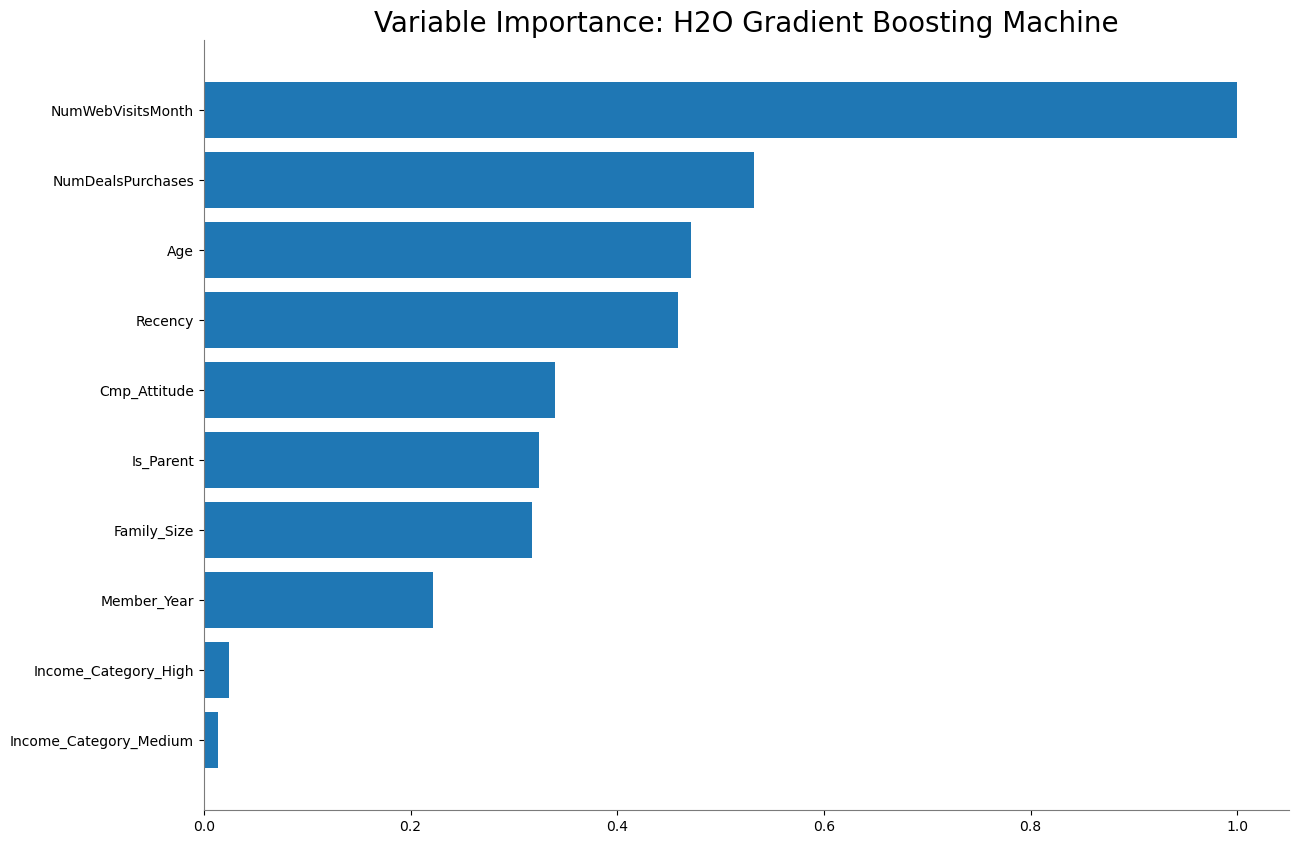

<Figure size 640x480 with 0 Axes>

In [8]:
# Get the best model
best_model = aml.leader

# Model performance and variable importance plots
performance = best_model.model_performance(test_hf)
print(performance)
best_model.varimp_plot()

In [10]:
from evidently.report import Report
from evidently.metrics import DataDriftTable, DatasetDriftMetric
# Data drift detection using Evidently
drift_report = Report(metrics=[
    DatasetDriftMetric(),  # Entire dataset drift analysis
    DataDriftTable()  # Feature-wise drift details
])

# Prepare the data for drift detection by adding the target column
train_df = train.copy()
test_df = test.copy()
train_df[target] = train_hf.as_data_frame()[target]
test_df[target] = test_hf.as_data_frame()[target]

# Run drift detection (train vs. test datasets)
drift_report.run(reference_data=train_df, current_data=test_df)

# Save the report as an HTML file
output_path = "/Users/user/Desktop/INSY695/group project/drift_report_automl.html"
drift_report.save_html(output_path)

print(f'Drift report generated and saved at: {output_path}')

/Users/user/anaconda3/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/Users/user/anaconda3/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.

Drift report generated and saved at: /Users/user/Desktop/INSY695/group project/drift_report_automl.html
